# TABLES DES MATIERES


# 1) Introduction                 Cells to

# 2) Consolidation des données par Ordres                    Cells  to 

# 3) Consolidation des données par Clients     Cells  to 

In [263]:
import pandas as pd
import unicodedata
import calendar
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

### Importer les bases orders and payment

In [264]:
orders = pd.read_csv('olist_orders_dataset.csv', delimiter=",")
payment = pd.read_csv('olist_order_payments_dataset.csv', delimiter=",")
customers=  pd.read_csv('olist_customers_dataset.csv', delimiter=",")
sellers=  pd.read_csv('olist_sellers_dataset.csv', delimiter=",")
products=  pd.read_csv('olist_products_dataset.csv', delimiter=",")
reviews=  pd.read_csv('olist_order_reviews_dataset.csv', delimiter=",")
items=  pd.read_csv('olist_order_items_dataset.csv', delimiter=",")
geolocation=  pd.read_csv('olist_geolocation_dataset.csv', delimiter=",")
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

### faire fusionner la table customers et payment

In [265]:
print("LIST ORDERS:",list(orders))
print("LIST PAYMENTS:",list(payment))
print("LIST CUSTOMERS:",list(customers))
print("LIST SELLERS:",list(sellers))
print("LIST PRODUCTS",list(products))
print("LIST REVIEWS",list(reviews))
print("LIST ITEMS",list(items))
print("LIST GEOLOCATION",list(geolocation))
print("LIST PRODUCT CATEGORY NAME TRANSLATION",list(product_category_name_translation))
geolocation = geolocation.rename(columns={"geolocation_zip_code_prefix" : "customer_zip_code_prefix"})

LIST ORDERS: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
LIST PAYMENTS: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
LIST CUSTOMERS: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
LIST SELLERS: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
LIST PRODUCTS ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
LIST REVIEWS ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
LIST ITEMS ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
LIS

### Nous allons renommer la clé primaire de la table géolocation pour qu'elle corresponde à celle de la table customers

In [266]:
geolocation = geolocation.rename(columns={"geolocation_zip_code_prefix" : "customer_zip_code_prefix"})

### Maintenant nous pouvons effectuer toutes les jointures possibles afin d'avoir un table finale. 

KeyboardInterrupt: 

In [258]:
base['order_approved_at'] = pd.to_datetime(base['order_approved_at'], errors='coerce')
base['order_delivered_carrier_date'] = pd.to_datetime(base['order_delivered_carrier_date'], errors='coerce')
base['order_delivered_customer_date'] = pd.to_datetime(base['order_delivered_customer_date'], errors='coerce')
base['order_estimated_delivery_date'] = pd.to_datetime(base['order_estimated_delivery_date'], errors='coerce')
base['order_purchase_timestamp'] = pd.to_datetime(base['order_purchase_timestamp'], errors='coerce')

### Les dimensions de notre table finale:

In [ ]:
print("DIMENSIONS:",base_finale.shape)
print("Nb total d'informations",base_finale.size)

# 1) Formating:

Tout d'abord, nous allons vérifier que nos variabales sont au bon format. 

### Convertisseur to_datetime

Convertisseur to category

In [ ]:
cat_name1 = base_finale['order_status'].unique().tolist()
cat_name2 = base_finale['payment_type'].unique().tolist()
cat_name3 = base_finale['product_category_name'].unique().tolist()
cat_name4 = base_finale['product_category_name_english'].unique().tolist()
cat_name5 = base_finale['geolocation_city'].unique().tolist()
cat_name6 = base_finale['geolocation_state'].unique().tolist()

#### Nous catégorisons les variables suivantes afin de permettre des meilleures visualisations

In [ ]:
base_finale['order_status'] = pd.Categorical(base_finale['order_status'], categories=cat_name1, ordered=False)

#### Nous allons enlever les accents pour éviter les doublons sur les noms de villes. 

In [ ]:
def supprime_accent(ligne):
        """ supprime les accents du texte source """
        accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â']
        sans_accent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a']
        i = 0
        while i < len(accent):
            base['ligne'] = ligne.replace(accent[i], sans_accent[i])
            i += 1
        return ligne
#base_finale['geolocation_city'].apply(supprime_accent)    

### La dataframe étant trop grande, mon ordinateur met trop de temps à calculer sur plusieurs millions d'observations. nous allons repasser sur une base plus petite semblable à celle que nous avions commencé en cours.

In [271]:
base = pd.merge(orders, customers, on='customer_id', how='left')
base = pd.merge(base, payment, on='order_id', how='left')

In [272]:
base['order_approved_at'] = pd.to_datetime(base['order_approved_at'], errors='coerce')
base['order_delivered_carrier_date'] = pd.to_datetime(base['order_delivered_carrier_date'], errors='coerce')
base['order_delivered_customer_date'] = pd.to_datetime(base['order_delivered_customer_date'], errors='coerce')
base['order_estimated_delivery_date'] = pd.to_datetime(base['order_estimated_delivery_date'], errors='coerce')
base['order_purchase_timestamp'] = pd.to_datetime(base['order_purchase_timestamp'], errors='coerce')

In [273]:
base.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
dtype: object

### La table "base" est composée de la jointure entre les tables ORDERS,CUSTOMERS ET PAYMENT. 

# 1) Consolidation des données par ordre

Tout d'abord, nous allons rajouter les variables "month", "year","day"," hour", et "month_year". 

In [260]:
base['month'] = base['order_purchase_timestamp'].dt.strftime('%m')
base['year'] =  base['order_purchase_timestamp'].dt.strftime('%Y')
base['day'] =  base['order_purchase_timestamp'].dt.strftime('%d')
base['hour'] = base['order_purchase_timestamp'].dt.strftime('%H')
base['year_month'] = base['order_purchase_timestamp'].dt.strftime('%Y-%m')

AttributeError: Can only use .dt accessor with datetimelike values

### Combien il y'a d'ordres par mois ?

<AxesSubplot:xlabel='month'>

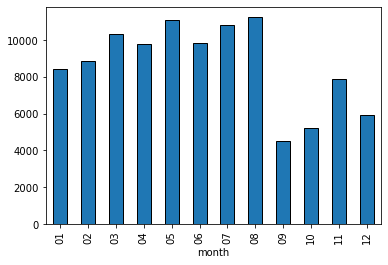

In [247]:
orders_per_months = base.groupby(base['month'])['order_id'].count()
orders_per_months.plot.bar()


Voici ci-dessus le nombre d'ordres par mois. C'est durant le mois d'aout qu'il y-en a le plus et c'est durant le mois suivant (septembre) qu'il y-en a le moins. 

### Combien de chiffre par mois ?

In [274]:
moyenne_payments=base['payment_value'].mean()
somme_payments=base['payment_value'].sum()
max_payment=base['payment_value'].max()

<AxesSubplot:xlabel='year_month'>

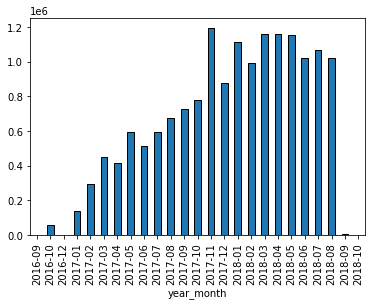

In [45]:
CA_per_months = base.groupby(base['year_month'])['payment_value'].sum()
CA_per_months.plot.bar()

### % d'ordres par heure et par jour ?

<AxesSubplot:>

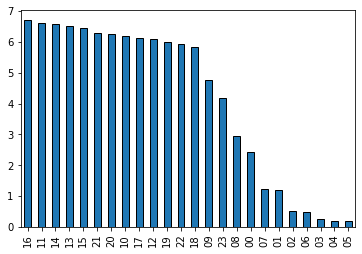

In [46]:

orders_per_hours = base['hour'].value_counts(normalize=True)*100
orders_per_hours.plot.bar()

In [275]:
orders_per_day = base['day'].value_counts(normalize=True, sort=True)*100
orders_per_day

KeyError: 'day'

### % de CA par heure et par jour ?

In [276]:
CA_per_days = base.groupby(base['day'])['payment_value'].sum()
CA_per_days.max()

KeyError: 'day'